#**Project Name:** *Iris Flower Classification*

##**Author Name:** Ganesh Arjun Patewar

##**Algorithms Used:** Logistic Regression and Decision Tree Classifier.

##**Project description:**

####Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

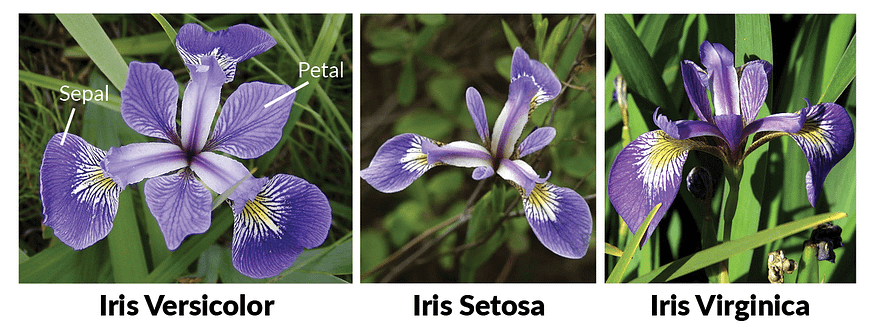

In [244]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [245]:
# Importing dataset from drive
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Iris.csv')

In [246]:
# First look of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [247]:
# Shape of data
df.shape

(150, 6)

In [248]:
# dropping the unnecessary column
df=df.drop('Id',axis=1)

In [249]:
# Checking the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [250]:
# Checking the duplicates
df.duplicated().sum()

3

In [251]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [252]:
# Reassuring the duplicates are removed
df.duplicated().sum()

0

In [253]:
# New shape of data after removing null and duplicate values
df.shape

(147, 5)

##Data Vizualization:

Chart 1: Pie plot as per count of different varieties of flowers.

In [254]:
a=df.groupby('Species',as_index=False)['SepalLengthCm'].count()
a

,Species,SepalLengthCm
0,Iris-setosa,48
1,Iris-versicolor,50
2,Iris-virginica,49


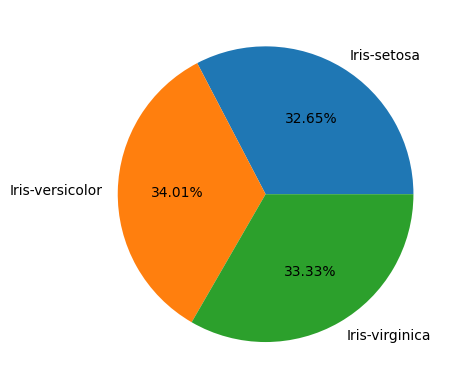

In [255]:
plt.pie(a['SepalLengthCm'],autopct='%0.2f%%',labels=a['Species'])
plt.show()

Chart 2: Plotting violinplot, distplot and boxplot for different features.

In [256]:
num_col=df.select_dtypes('number')
columns=num_col.columns
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

SepalLengthCm
Skewness 0.29255956516307163


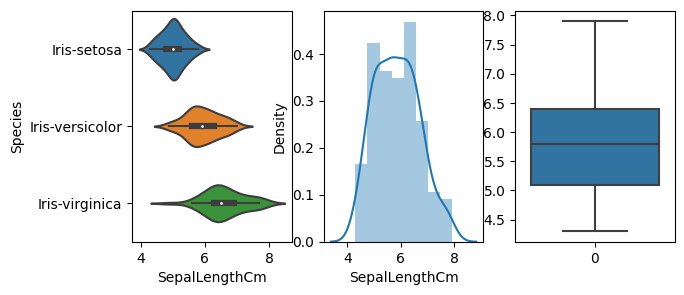

SepalWidthCm
Skewness 0.3243506195620299


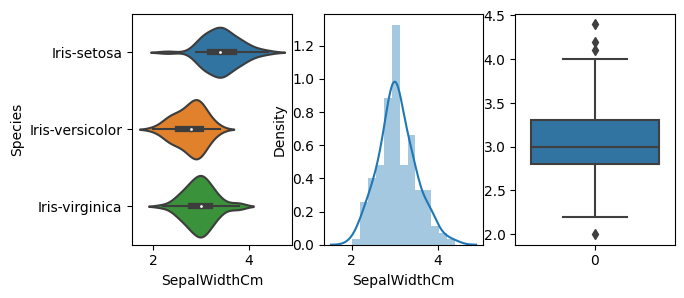

PetalLengthCm
Skewness -0.2937634574565383


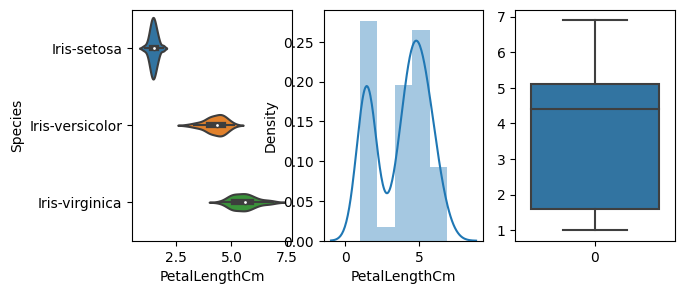

PetalWidthCm
Skewness -0.11347861374619836


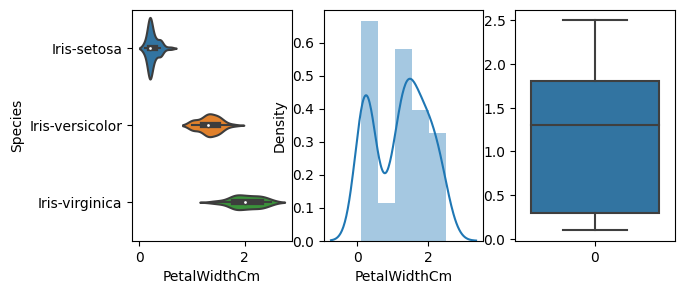

In [257]:
for col in columns:
  print(col)
  print('Skewness',df[col].skew())
  plt.figure(figsize=(7,3))
  plt.subplot(1,3,1)
  sns.violinplot(data=df,x=col,y='Species')

  plt.subplot(1,3,2)
  sns.distplot(df[col])

  plt.subplot(1,3,3)
  sns.boxplot(df[col])

  plt.show()

Chart 3: Plotting the Heatmap

In [258]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


<Axes: >

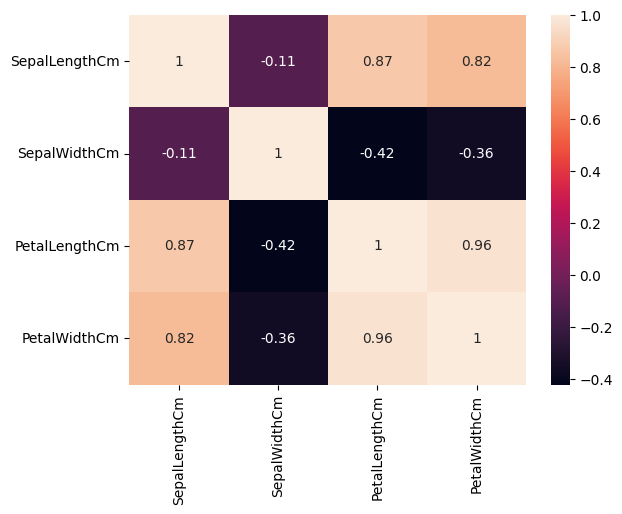

In [259]:
sns.heatmap(df.corr(),annot=True)

Chart 4: Plotting the pairplot.

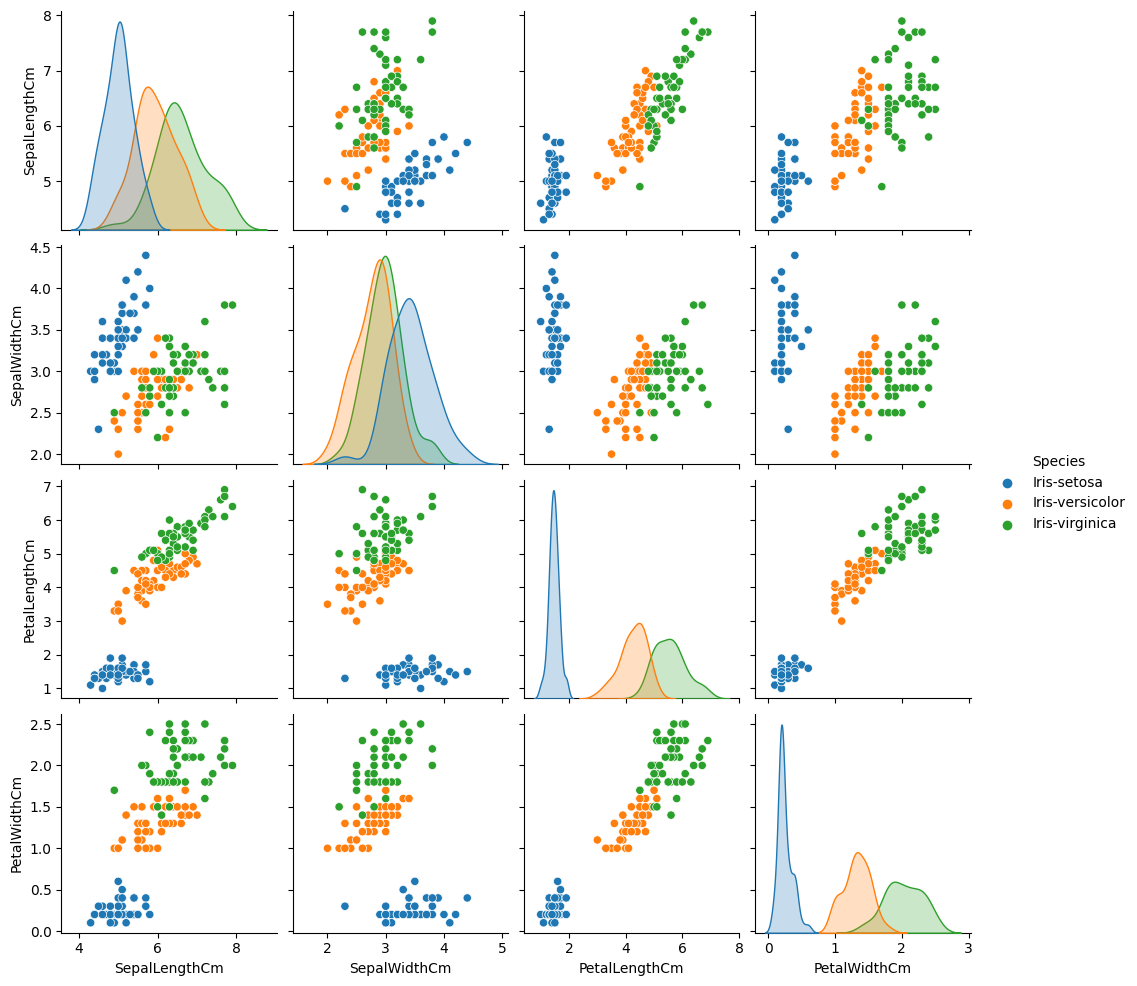

In [260]:
sns.pairplot(df,hue='Species')

In [261]:
# Dependent variables:
X=df.iloc[:,:4]

In [262]:
# Independent variable:
y=df.iloc[:,-1]

In [263]:
# Spillting the data into test and train
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=108)

In [264]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (117, 4)
Shape of X_test (30, 4)
Shape of y_train (117,)
Shape of y_test (30,)


##Using Logistic regression:

In [265]:
# Importing libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [266]:
# Declaring paramters for GridSearchCV
parameters={'penalty':['l1', 'l2', 'elasticnet'],'max_iter':[100,200,300,500,1000],'C':[1,2,3,4,5,10,15,20]}

In [267]:
classifier=LogisticRegression()

In [268]:
 # Applying GridSearchCV for model building
classifier_regressor=GridSearchCV(classifier,param_grid= parameters,scoring='accuracy',cv=5)

In [269]:
# Fitting the data in model
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [270]:
# Best parameters choosed by GridSearchCV for model
classifier_regressor.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}

In [271]:
classifier_regressor.best_score_

0.975

In [272]:
# Prediction of y_train by model
y_train_pred=classifier_regressor.predict(X_train)

In [273]:
score_train=accuracy_score(y_train_pred,y_train)
print(f'The accuracy score for train data is {score_train}')

The accuracy score for train data is 0.9829059829059829


In [274]:
# Prediction of y_test by model
y_test_pred=classifier_regressor.predict(X_test)

In [275]:
score=accuracy_score(y_test,y_test_pred)
print(f'The accuracy score for test data is {score}')

The accuracy score for test data is 0.9333333333333333


In [276]:
# Classification report for train data
print(classification_report(y_train_pred,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.95      1.00      0.98        40
 Iris-virginica       1.00      0.96      0.98        45

       accuracy                           0.98       117
      macro avg       0.98      0.99      0.98       117
   weighted avg       0.98      0.98      0.98       117



In [277]:
# Printing Confusion matrix
from sklearn.metrics import confusion_matrix

In [278]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[16  0  0]
 [ 0  7  1]
 [ 0  1  5]]


In [279]:
labels=df['Species'].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(0, 0.5, 'Iris-setosa'),
 Text(0, 1.5, 'Iris-versicolor'),
 Text(0, 2.5, 'Iris-virginica')]

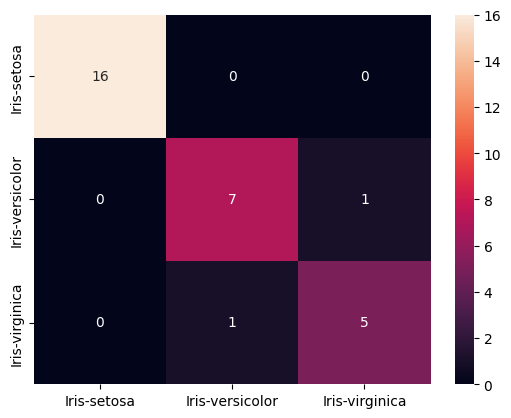

In [280]:
ax= plt.subplot()
sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##Conclusion of Logistic regression:
###The Logistic Regression giving train accuracy =0.98  and test accuracy= 0.93



#Using Decision Tree Classifier:

In [281]:
# Importing library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [282]:
Classifier=DecisionTreeClassifier()

###First cut without hyperparameter tuning.

In [283]:
# Fitting the train data 
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

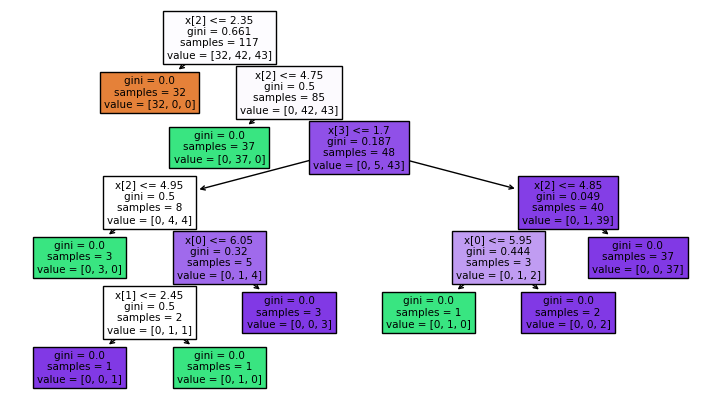

In [284]:
# Plotting the decision tree
from sklearn import tree
plt.figure(figsize=(9,5))
tree.plot_tree(Classifier,filled=True)
plt.show()

In [285]:
# Prediciting the y_train
y_train_pred=Classifier.predict(X_train)

In [302]:
score_train=accuracy_score(y_train,y_train_pred)
print(f'The accuray score for train data is {score_train}')

The accuray score for train data is 0.9829059829059829


In [287]:
# Prediciting the y_test
y_test_pred=Classifier.predict(X_test)

In [303]:
score_test=accuracy_score(y_test,y_test_pred)
print(f'The accuray score for test data is {score_test}')

The accuray score for test data is 0.9666666666666667


### Second Cut using Hyperparameter Tuning:

In [289]:
#Importing GridSearcCV for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [290]:
# Declaring the parameters
parameters={'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'min_samples_split': [0,1,2],
            'max_depth':[1,2,3],
            'min_samples_leaf':[0,1,2,3],
            'max_features':['auto', 'sqrt', 'log2']}

In [291]:
# Fitting the model in the GridSearchCV
dtcv=GridSearchCV(Classifier,parameters,cv=5,scoring='accuracy')

In [292]:
dtcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0, 1, 2, 3],
                         'min_samples_split': [0, 1, 2],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [293]:
# Best parameters according to the GridSearchCV
dtcv.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [294]:
dtcv.best_score_

0.9666666666666668

In [295]:
from sklearn.metrics import accuracy_score, classification_report

In [296]:
# Prediciting the y_train
y_train_pred=dtcv.predict(X_train)

In [304]:
score=accuracy_score(y_train_pred,y_train)
print(f'The accuracy score fot train data is {score}')

The accuracy score fot train data is 0.9829059829059829


In [298]:
print(classification_report(y_train_pred,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.95      1.00      0.98        40
 Iris-virginica       1.00      0.96      0.98        45

       accuracy                           0.98       117
      macro avg       0.98      0.99      0.98       117
   weighted avg       0.98      0.98      0.98       117



In [299]:
# Prediciting the y_test
y_test_pred=dtcv.predict(X_test)

In [305]:
score_test=accuracy_score(y_test_pred,y_test)
print(f'The accuracy score fot test data is {score_test}')

The accuracy score fot test data is 0.9666666666666667


#Conclusion:

###In the given classification problem, both Logistic Regression and Decision Tree Classifier exhibit high accuracy scores. Logistic Regression achieves a training score of 98.3% and a test score of 93.3%, while the Decision Tree Classifier achieves a training score of 98.3% and a higher test score of 96.6%.

###Considering the accuracy scores, it can be inferred that the Decision Tree Classifier performs slightly better than Logistic Regression in terms of predictive accuracy. Therefore, for this particular classification problem, the Decision Tree Classifier may be preferred.

###However, it is important to note that the decision should not be solely based on accuracy scores, as other factors such as interpretability, computational efficiency, and additional evaluation metrics should also be taken into account.

###Moreover, the observation that both algorithms achieve similar accuracy scores can be attributed to the small size of the dataset. It is possible that with a larger dataset, the accuracy scores might vary between the algorithms, and the superiority of the Decision Tree Classifier may not hold.

###In summary, while the Decision Tree Classifier exhibits a slightly higher accuracy score in this scenario, a comprehensive analysis considering various factors and evaluation metrics is recommended for making an informed choice of the algorithm for this classification problem.
